In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
piracy_df_original = pd.read_csv('Data_Files\[Clean] IMO Piracy - 2000 to 2022 (PDV 01-2023).csv')
# pd.concat([piracy_df_original.head(), piracy_df_original.tail()])
piracy_df_original.head(1)

Incident Date Ship Name Ship Flag Ship Type                     Area  \
0     3/18/2010  AL-ASA'A     Yemen      Dhow  In international waters   

   Latitude  Longitude Consequences to Crew Part of Ship Raided Ship Status  \
0       NaN        NaN        Ship Hijacked          Not Stated  Not Stated   

           Weapons Used  Flag - Crew Injuries  Flag - Crew Held Hostage  \
0  None or Not Reported                 False                      True   

   Flag - Crew Missing  Flag - Crew Deaths  Flag - Crew Assaulted  
0                False               False                  False

In [3]:
#piracy_df_original['Part of Ship Raided'].value_counts()

In [4]:
#piracy_df_original['Consequences to Crew'].value_counts()

In [5]:
#piracy_df_original['Flag - Crew Injuries'].value_counts()

In [6]:
#piracy_df_original['Flag - Crew Held Hostage'].value_counts()

In [7]:
#piracy_df_original['Flag - Crew Missing'].value_counts()

In [8]:
#piracy_df_original['Flag - Crew Deaths'].value_counts()

In [9]:
#piracy_df_original['Flag - Crew Assaulted'].value_counts()

In [10]:
piracy_df_original['Ship Type'].unique()

array(['Dhow', 'Fishing vessel', 'Tanker', 'Supply ship',
       'General cargo ship', 'Tug', 'Container ship', 'Yacht',
       'Bulk carrier', 'Chemical tanker', 'General dry cargo ship',
       'Not Reported', 'Vehicle carrier', 'Ro-ro-cargo ship',
       'Oil product tanker', 'Product tanker',
       'Mobile offshore drilling unit', 'Barge carrier', 'LPG tanker',
       'Oil tanker', 'Rescue/standby ship', 'Refrigerated cargo carrier',
       'Livestock carrier', 'Passenger ship', 'Special purpose ship',
       'Ro-Ro-cargo ship', 'Gas carrier-LPG', 'Reefer', 'Landing craft',
       'Cable-Layer', 'Ore/bulk/oil carrier', 'Barge', 'Fishing trawler',
       'Heavy load carrier', 'Gas carrier - LNG', 'Chemical Tanker',
       'Ore/bulk/oil Carrier', 'Research ship', 'Multi purpose ship',
       'Cutter/dredger', 'Container', 'Refrigerated ship',
       'Fishing vessels', 'Product Tanker', 'Boat', 'Unknown',
       'Barter Trade Boat', 'LPG', 'Oil Tanker', 'Ferry',
       'Cement carrie

In [11]:
piracy_df_map = piracy_df_original.dropna(subset=['Latitude','Longitude']) #drop lat/long nulls for a map

### Adding severity column to piracy_df_original and piracy_df_map
Note: this is probably not the most efficent way to do this but end result works 

In [75]:
severe_df_1 = piracy_df_original[(piracy_df_original['Flag - Crew Deaths'] == True) | (piracy_df_original['Flag - Crew Missing'] == True)]
severe_df_1.loc[:, 'severity'] = 'high'

In [76]:
medium_df_1 = piracy_df_original[(piracy_df_original['Flag - Crew Assaulted'] == True) | (piracy_df_original['Flag - Crew Injuries'] == True) | (piracy_df_original['Flag - Crew Held Hostage'] == True)]
medium_df_1.loc[:, 'severity'] = 'medium'

In [77]:
low_df_1 = piracy_df_original[(piracy_df_original['Flag - Crew Assaulted'] == False) & (piracy_df_original['Flag - Crew Injuries'] == False) & (piracy_df_original['Flag - Crew Held Hostage'] == False) & (piracy_df_original['Flag - Crew Deaths'] == False) & (piracy_df_original['Flag - Crew Missing'] == False)]
low_df_1.loc[:, 'severity'] = 'low'

In [78]:
dfs1 = [ low_df_1, medium_df_1, severe_df_1]

In [79]:
piracy_df_original = pd.concat(dfs1).reset_index(drop=True) 

In [80]:
piracy_df_original.head(1)

Incident Date Ship Name Ship Flag Ship Type                     Area  \
0     5/25/2010  AL JAWAT     Yemen      Dhow  In international waters   

   Latitude  Longitude Consequences to Crew Part of Ship Raided Ship Status  \
0       NaN        NaN        Ship Hijacked          Not Stated    Steaming   

           Weapons Used  Flag - Crew Injuries  Flag - Crew Held Hostage  \
0  None or Not Reported                 False                     False   

   Flag - Crew Missing  Flag - Crew Deaths  Flag - Crew Assaulted  \
0                False               False                  False   

   Vessel Category severity  
0  Passenger ships      low

In [81]:
severe_df = piracy_df_map[(piracy_df_map['Flag - Crew Deaths'] == True) | (piracy_df_map['Flag - Crew Missing'] == True)]

In [82]:
severe_df.loc[:,'severity'] = 'high'

In [83]:
medium_df = piracy_df_map[(piracy_df_map['Flag - Crew Assaulted'] == True) | (piracy_df_map['Flag - Crew Injuries'] == True) | (piracy_df_map['Flag - Crew Held Hostage'] == True)]

In [84]:
medium_df.loc[:, 'severity'] = 'medium'

In [85]:
low_df = piracy_df_map[(piracy_df_map['Flag - Crew Assaulted'] == False) & (piracy_df_map['Flag - Crew Injuries'] == False) & (piracy_df_map['Flag - Crew Held Hostage'] == False) & (piracy_df_map['Flag - Crew Deaths'] == False) & (piracy_df_map['Flag - Crew Missing'] == False)]

In [86]:
low_df.loc[:, 'severity'] = 'low'

In [87]:
dfs = [ low_df, medium_df, severe_df]

In [88]:
piracy_df_map = pd.concat(dfs).reset_index(drop=True) 

In [89]:
piracy_df_map.head(1)

Incident Date Ship Name Ship Flag Ship Type                     Area  \
0     4/21/2012   ALABASS     Yemen      Dhow  In international waters   

    Latitude  Longitude Consequences to Crew Part of Ship Raided Ship Status  \
0  15.333333       52.2        Ship Hijacked          Not Stated    Steaming   

           Weapons Used  Flag - Crew Injuries  Flag - Crew Held Hostage  \
0  None or Not Reported                 False                     False   

   Flag - Crew Missing  Flag - Crew Deaths  Flag - Crew Assaulted severity  
0                False               False                  False      low

In [15]:
import folium
from streamlit_folium import st_folium
import streamlit as st

# Create a map using Folium
map_center = [piracy_df_original['Latitude'].mean(), piracy_df_original['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=4)

# Add markers for vessel type, ship status, and country
for index, row in severe_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='black', fill=True, fill_color='black', popup=popup_text).add_to(m)

for index, row in medium_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='red', fill=True, fill_color='red', popup=popup_text).add_to(m)

for index, row in low_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='yellow', fill=True, fill_color='yellow', popup=popup_text).add_to(m)

#example box need to figure out exact area to investigate

top_left1 = [7, -1] #west neg 
bottom_right1 = [-2,10] #south eng 
Gulf_Guinea = folium.Rectangle(bounds=[top_left1, bottom_right1], color='black', fill=False)
Gulf_Guinea.add_to(m)

top_left2 = [20, 40] #west neg 
bottom_right2 = [10, 55.17] #south neg 
Gulf_Aden = folium.Rectangle(bounds=[top_left2, bottom_right2], color='black', fill=False)
Gulf_Aden.add_to(m)

top_left3 = [10, 93] #west neg 
bottom_right3 = [-10, 110] #south neg 
Strait_Malacca = folium.Rectangle(bounds=[top_left3, bottom_right3], color='black', fill=False)
Strait_Malacca.add_to(m)

#legend
legend_html = '''
     <div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 120px; background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
     <p><strong>Legend</strong></p>
     <p><i class="fa fa-circle fa-1x" style="color:black"></i> Severe</p>
     <p><i class="fa fa-circle fa-1x" style="color:red"></i> Medium</p>
     <p><i class="fa fa-circle fa-1x" style="color:yellow"></i> Low</p>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m.save('piracy_map.html')



In [16]:
m

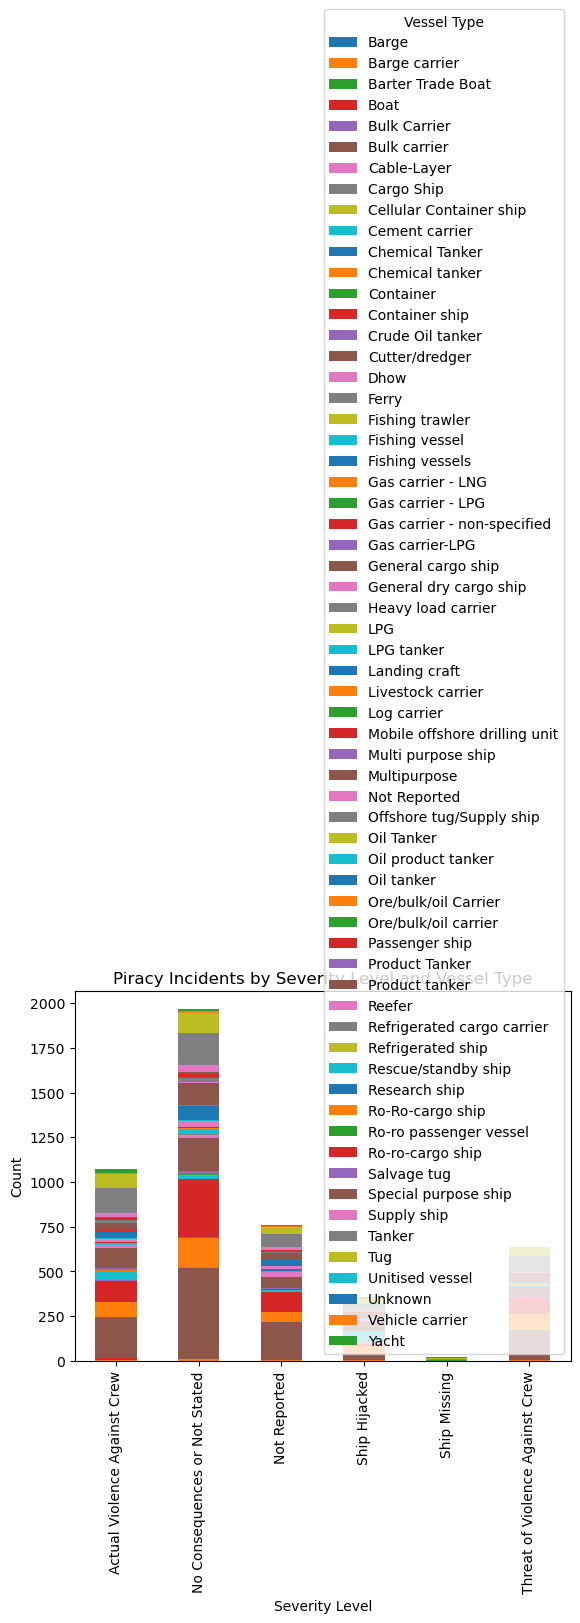

In [17]:
#big picture 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming piracy_original_df is your DataFrame containing the piracy incidents data
# Group the data by severity level and vessel type, and count the occurrences
severity_vessel_counts = piracy_df_original.groupby(['Consequences to Crew', 'Ship Type']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Vessel Type')
plt.legend(title='Vessel Type')
#plt.show()

In [18]:
vessel_type_mapping = {
    'Cargo ships': ['General cargo ship', 'Container ship', 'Container', 'General dry cargo ship', 'Bulk carrier', 'Bulk Carrier', 
                    'Vehicle carrier', 'Ro-ro-cargo ship','Ro-Ro-cargo', 'Refrigerated cargo carrier', 
                    'Livestock carrier', 'Reefer', 'Cable-Layer', 'Ore/bulk/oil carrier', 
                    'Ore/bulk/oil Carrier',  'Cellular Container ship',
                    'Cargo Ship', 'Log carrier', 'Unitised vessel','Cement carrier','Heavy load carrier','Barge carrier'],
    
    'Fishing': ['Fishing vessel', 'Fishing trawler', 'Fishing vessels'],

    'Non commercial ships': ['Research ship','Rescue/standby ship'],

    'Passenger ships': ['Dhow','Ro-ro passenger vessel', 'Ferry', 'Passenger ship', 'Yacht'],

    'Service ships': ['Salvage tug','Tug', 'Supply ship', 'Offshore tug/Supply ship'],

    'Tankers': ['Tanker', 'Chemical tanker', 'Chemical Tanker', 'Oil product tanker', 'Product tanker', 'Product Tanker', 
                'LPG tanker', 'Oil tanker', 'Oil Tanker','Gas carrier-LPG', 'Gas carrier - LPG', 'LPG', 'Gas carrier - LNG','Gas carrier - non-specified',
                'Crude Oil tanker'],

    'All others': ['Cutter/dredger', 'Barge', 'Barge Mobile offshore drilling unit', 'Refrigerated ship', 'Boat', 'Barter Trade Boat', 
                    'Multi purpose ship','Multipurpose','Special purpose ship', 'Landing craft'],

    'Unknown': ['Not Reported', 'Unknown']}

In [19]:
# Function to map vessel types to categories
def map_vessel_type(vessel_type):
    for category, types in vessel_type_mapping.items():
        if vessel_type in types:
            return category



In [20]:
piracy_df_original['Vessel Category'] = piracy_df_original['Ship Type'].map(map_vessel_type) #map the categories to the new types 


In [21]:
# Define the range of latitude and longitude values
#strait of malacca 
min_lat = -10
max_lat = 10
min_lon = 93
max_lon = 150.0

# Filter the DataFrame based on the range of latitude and longitude values make sure to use piracy_df_map bc null values will mess up the dataframe
strait_malacca_df = piracy_df_map[(piracy_df_map['Latitude'] >= min_lat) & (piracy_df_map['Latitude'] <= max_lat) &
                                  (piracy_df_map['Longitude'] >= min_lon) & (piracy_df_map['Longitude'] <= max_lon)]

# Display the filtered DataFrame

In [22]:
strait_malacca_df.loc[:,'Vessel Category'] = strait_malacca_df['Ship Type'].map(map_vessel_type)


C:\Users\julia\AppData\Local\Temp\ipykernel_57540\1065735473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strait_malacca_df.loc[:,'Vessel Category'] = strait_malacca_df['Ship Type'].map(map_vessel_type)


In [23]:
#Gulf Eden  

min_lat = 10
max_lat = 20
min_lon = 93
max_lon = 110.0

# Filter the DataFrame based on the range of latitude and longitude values make sure to use piracy_df_map bc null values will mess up the dataframe
gulf_of_eden_df = piracy_df_map[(piracy_df_map['Latitude'] >= min_lat) & (piracy_df_map['Latitude'] <= max_lat) &
                                  (piracy_df_map['Longitude'] >= min_lon) & (piracy_df_map['Longitude'] <= max_lon)]

# Display the filtered DataFrame

In [24]:
gulf_of_eden_df.loc[:,'Vessel Category'] = gulf_of_eden_df['Ship Type'].map(map_vessel_type)


C:\Users\julia\AppData\Local\Temp\ipykernel_57540\2265968537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gulf_of_eden_df.loc[:,'Vessel Category'] = gulf_of_eden_df['Ship Type'].map(map_vessel_type)


In [25]:
#Gulf of Guinea
min_lat = -2
max_lat = 7
min_lon = -1
max_lon = 10

# Filter the DataFrame based on the range of latitude and longitude values make sure to use piracy_df_map bc null values will mess up the dataframe
gulf_of_guinea_df = piracy_df_map[(piracy_df_map['Latitude'] >= min_lat) & (piracy_df_map['Latitude'] <= max_lat) &
                                  (piracy_df_map['Longitude'] >= min_lon) & (piracy_df_map['Longitude'] <= max_lon)]

# Display the filtered DataFrame

In [26]:
gulf_of_guinea_df.loc[:,'Vessel Category'] = gulf_of_guinea_df['Ship Type'].map(map_vessel_type)


C:\Users\julia\AppData\Local\Temp\ipykernel_57540\997917489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gulf_of_guinea_df.loc[:,'Vessel Category'] = gulf_of_guinea_df['Ship Type'].map(map_vessel_type)


### All DataFrames created:

In [62]:
###The specific dataframes for our box areas.
piracy_df_original #original dataframe that includes all events regardless of whether lat/longs are available
piracy_df_map #contains only data that includes lat/long in order to plot on map
strait_malacca_df
gulf_of_eden_df
gulf_of_guinea_df

Incident Date       Ship Name            Ship Flag           Ship Type  \
11       12/4/2018   SAAVEDRA TIDE              Vanuatu         Supply ship   
42       7/13/2019   Name withheld               Turkey  General cargo ship   
50      11/16/2020   Name Withheld                 Togo        Not Reported   
59       9/22/2018       MV GLARUS          Switzerland        Bulk carrier   
61       4/15/2019   SAN PADRE PIO          Switzerland      Product tanker   
...            ...             ...                  ...                 ...   
4494     4/25/2013  CITY OF XIAMEN  Antigua and Barbuda      Container ship   
4632     8/14/2019    PRINCE JOB 1              Nigeria         Supply ship   
4658    10/25/2014         STRIDER     Marshall Islands          Oil tanker   
4714     4/12/2012    SCF PROVIDER              Liberia              Tanker   
4771    11/16/2008     THOR GALAXY            Hong Kong  General cargo ship   

                         Area  Latitude  Longitude  \
11    In international waters  3.133333   6.333333   
42    In international waters  2.966667   4.666667   
50      In territorial waters  5.466667   1.416667   
59    In international waters  3.755333   6.716833   
61      In territorial waters  4.468333   7.168333   
...                       ...       ...        ...   
4494  In international waters  4.166667   5.500000   
4632             In port area  4.675000   7.155167   
4658    In territorial waters  6.320500   3.400000   
4714    In territorial waters  5.975000   1.280000   
4771    In territorial waters  5.575500   5.373167   

               Consequences to Crew            Part of Ship Raided  \
11                     Not Reported                     Not Stated   
42                    Ship Hijacked                     Not Stated   
50                     Not Reported                     Not Stated   
59     Actual Violence Against Crew                     Not Stated   
61     Actual Violence Against Crew                     Not Stated   
...                             ...                            ...   
4494   Actual Violence Against Crew  Master and Crew Accomodations   
4632  No Consequences or Not Stated                    Engine Room   
4658  No Consequences or Not Stated                    Engine Room   
4714  No Consequences or Not Stated                    Engine Room   
4771                  Ship Hijacked                    Engine Room   

     Ship Status          Weapons Used  Flag - Crew Injuries  \
11      Steaming  None or Not Reported                 False   
42      Steaming  None or Not Reported                 False   
50    Not Stated  None or Not Reported                 False   
59      Steaming  None or Not Reported                  True   
61     At Anchor              Firearms                  True   
...          ...                   ...                   ...   
4494    Steaming  None or Not Reported                 False   
4632   At Anchor  None or Not Reported                 False   
4658  Not Stated  None or Not Reported                 False   
4714   At Anchor              Firearms                 False   
4771  Not Stated              Firearms                 False   

      Flag - Crew Held Hostage  Flag - Crew Missing  Flag - Crew Deaths  \
11                       False                False               False   
42                        True                False               False   
50                        True                 True               False   
59                        True                False               False   
61                       False                False               False   
...                        ...                  ...                 ...   
4494                      True                False               False   
4632                     False                False               False   
4658                     False                False               False   
4714                     False                F

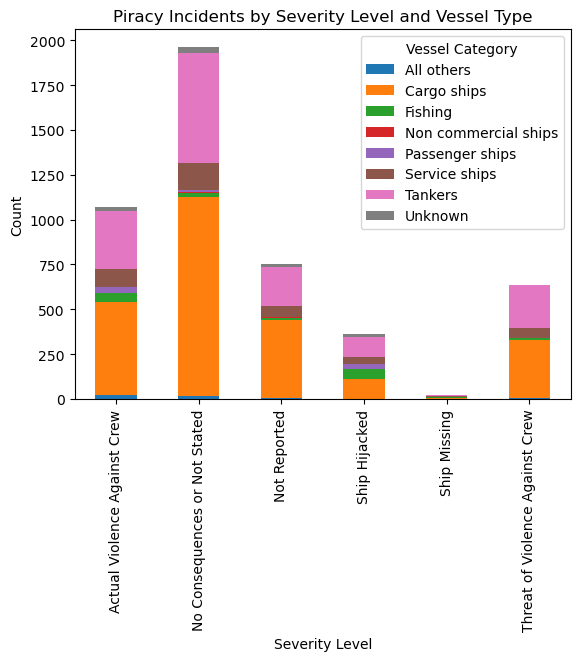

In [28]:
#Bid picture across the globe. 

severity_vessel_counts = piracy_df_original.groupby(['Consequences to Crew', 'Vessel Category']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Vessel Type')
plt.legend(title='Vessel Category')
plt.show()

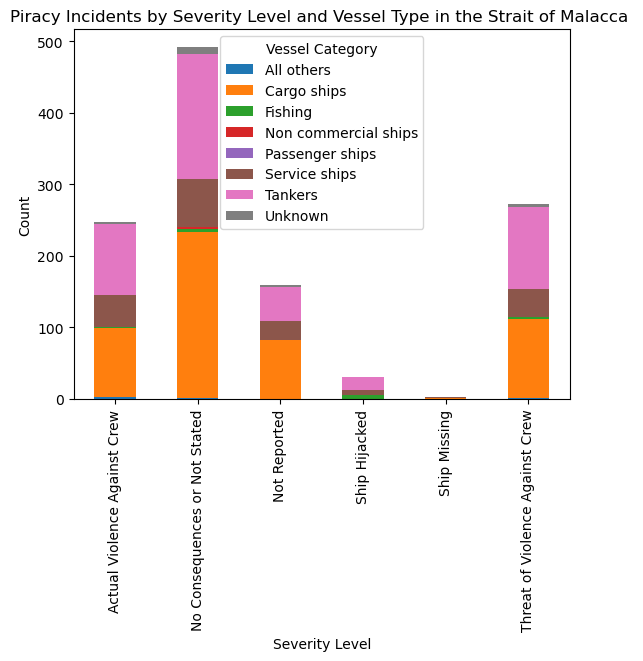

In [29]:

severity_vessel_counts = strait_malacca_df.groupby(['Consequences to Crew', 'Vessel Category']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Vessel Type in the Strait of Malacca ')
plt.legend(title='Vessel Category')
plt.show()

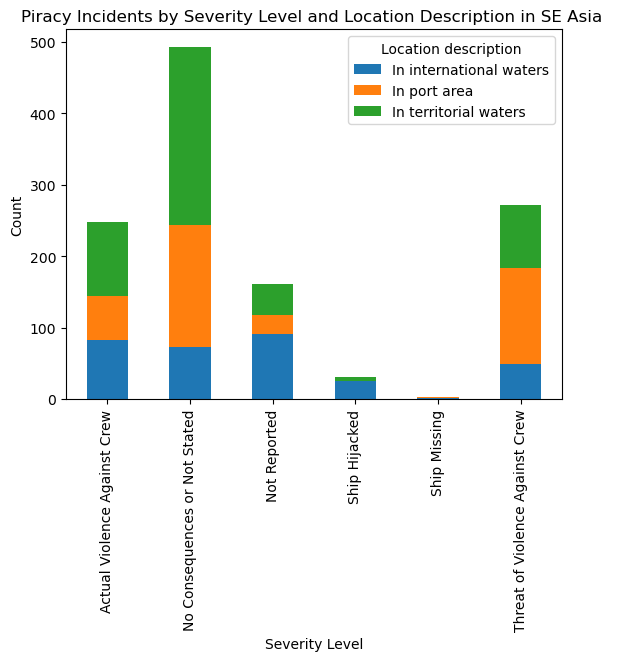

In [30]:
severity_vessel_counts = strait_malacca_df.groupby(['Consequences to Crew', 'Area']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Location Description in SE Asia ')
plt.legend(title='Location description')
plt.show()

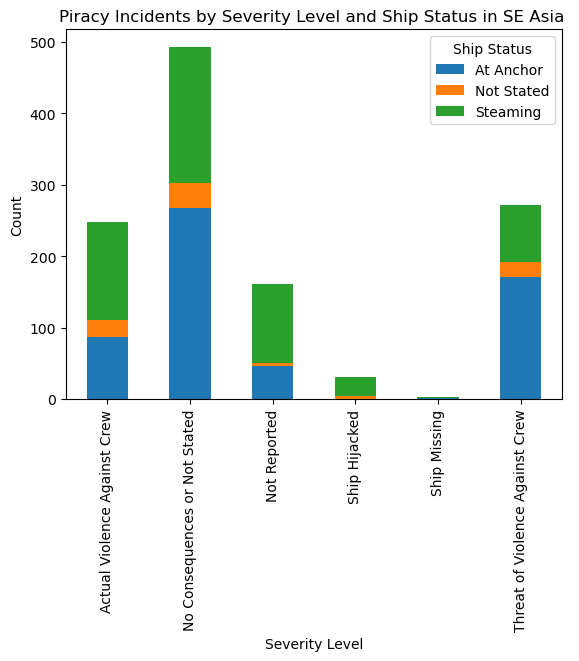

In [31]:
severity_vessel_counts = strait_malacca_df.groupby(['Consequences to Crew', 'Ship Status']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Ship Status in SE Asia ')
plt.legend(title='Ship Status')
plt.show()

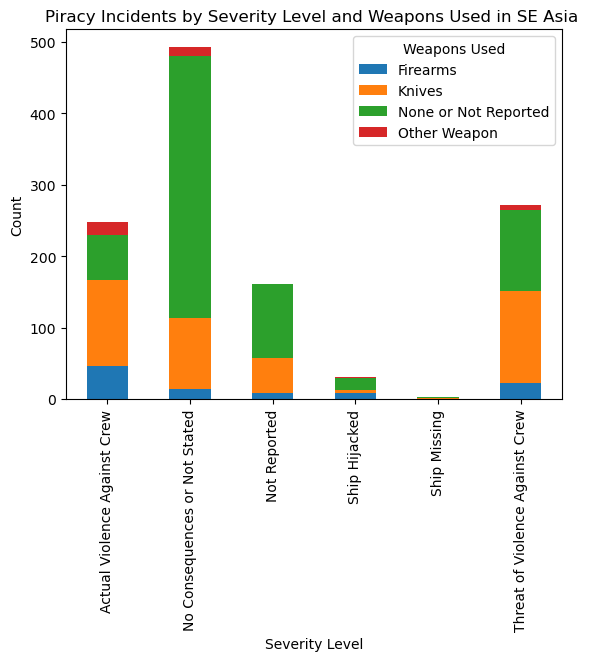

In [32]:
severity_vessel_counts = strait_malacca_df.groupby(['Consequences to Crew', 'Weapons Used']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Weapons Used in SE Asia ')
plt.legend(title='Weapons Used')
plt.show()